In [1]:
from util.plotting import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, time, timedelta
import re
pd.set_option('display.max_columns', None)

In [2]:
path = f'data/website_visits_chatgpt.csv' # datasource: similarweb
df = pd.read_csv(path)
df = df[::-1]

df

,Month,Monthly Website Visits (billions)
21,2022-11,0.15
20,2022-12,0.27
19,2023-01,0.62
18,2023-02,1.00
17,2023-03,1.60
16,2023-04,1.70
15,2023-05,1.90
14,2023-06,1.60
13,2023-07,1.50
12,2023-08,1.40


In [3]:
# monthly outage count
path = f'data/clean/outage/2024-08-31/outage_unexploded.csv'
df_outage = pd.read_csv(path, parse_dates=['Date'])
df_outage  = df_outage[df_outage['Service'] == 'chatgpt']
df_outage['Month'] = df_outage['Date'].dt.strftime('%Y-%m')
df_outage = df_outage[df_outage['outage_flag'] >= 1]
df_outage = df_outage.groupby('Month').size().reset_index(name='Outage Count')

df_outage

,Month,Outage Count
0,2023-02,5
1,2023-03,4
2,2023-04,1
3,2023-05,3
4,2023-06,1
5,2023-07,3
6,2023-08,4
7,2023-09,2
8,2023-11,5
9,2023-12,2


In [4]:
# monthly incidents
path = f'data/clean/incident/2024-08-31/incident_stages.csv'
df_incident = pd.read_csv(path)
df_incident = df_incident[df_incident['ChatGPT'] == 1]
df_incident['Month'] = df_incident['start_timestamp'].str.slice(0, 7)
df_incident = df_incident.groupby('Month').size().reset_index(name='Incident Count')
df_incident


,Month,Incident Count
0,2023-02,5
1,2023-03,6
2,2023-04,3
3,2023-05,6
4,2023-06,2
5,2023-07,7
6,2023-08,7
7,2023-09,6
8,2023-10,2
9,2023-11,8


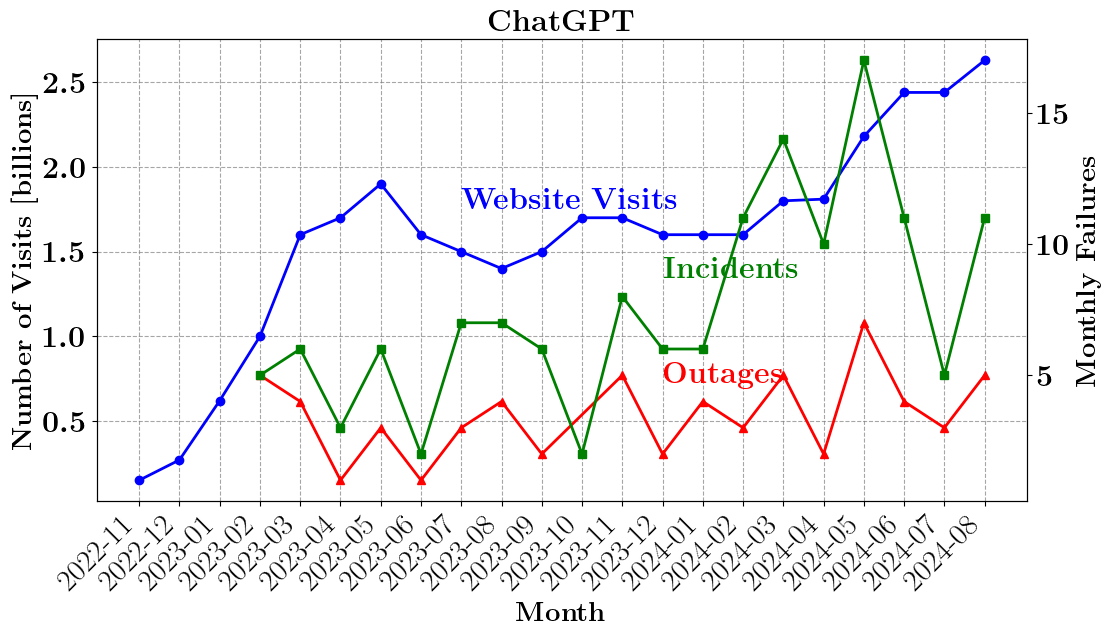

In [5]:
set_one_column_figure_font(height_multiplier=1.0)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the number of visits on the left y-axis
ax1.plot(df['Month'], df['Monthly Website Visits (billions)'], marker='o', linewidth=2, color='b', label='ChatGPT Visits')
ax1.set_xlabel(r'\textbf{Month}')
ax1.set_ylabel(r'\textbf{Number of Visits [billions]}')
ax1.tick_params(axis='y', labelsize=22)
# ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Create the second y-axis on the right
ax2 = ax1.twinx()
ax2.plot(df_outage['Month'], df_outage['Outage Count'], marker='^', linewidth=2, color='r', label='Outages')
ax2.plot(df_incident['Month'], df_incident['Incident Count'], marker='s', linewidth=2, color='g', label='Incidents')

ax2.set_ylabel(r'\textbf{Monthly Failures}')
ax2.tick_params(axis='y', labelsize=22)

ax1.set_xticks(range(len(df['Month'])))
ax1.set_xticklabels(df['Month'], rotation=45, ha='right', fontsize=22)

# Add annotations for each line
ax1.text(len(df['Month']) - 14, df['Monthly Website Visits (billions)'].iloc[-13]+0.4, r'\textbf{Website Visits}', color='b', fontsize=22, verticalalignment='center')
ax2.text(len(df_outage['Month']) - 5, df_outage['Outage Count'].iloc[-4]-2, r'\textbf{Outages}', color='r', fontsize=22, verticalalignment='center')
ax2.text(len(df_incident['Month']) - 6, df_incident['Incident Count'].iloc[-1]-2, r'\textbf{Incidents}', color='g', fontsize=22, verticalalignment='center')

ax1.grid(True, linestyle='--', color='gray', alpha=0.7)
# ax2.grid(True, linestyle='--', color='gray', alpha=0.7)

# # Add legends
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

plt.title(r'\textbf{ChatGPT}', fontsize=22)

plt.savefig('plot/chatgpt_visits.pdf', bbox_inches='tight')
plt.savefig('plot/chatgpt_visits.png', bbox_inches='tight')
plt.show()


